In [1]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt



In [2]:
keras.backend.clear_session()
model = keras.models.load_model('devanagari_minst.h5')

In [3]:
image = keras.preprocessing.image.load_img('test_image.png', target_size=(32,32))

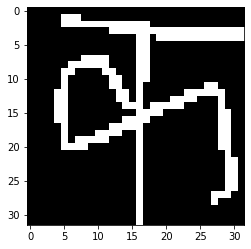

In [4]:
plt.imshow(image)

In [5]:
input_arr = keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])/255

In [6]:
input_arr.shape

(1, 32, 32, 3)

In [7]:
res2 = model.predict(input_arr)

In [27]:
x = np.argmax(res2)

In [28]:
max(res2)[0]

1.2057473e-14

In [10]:
import json

with open('./class_labels.json', 'r') as f:
    class_labels = json.load(f)

In [11]:
class_labels

{'0': 0,
 '1': 1,
 '10': 2,
 '11': 3,
 '12': 4,
 '13': 5,
 '14': 6,
 '15': 7,
 '16': 8,
 '17': 9,
 '18': 10,
 '19': 11,
 '2': 12,
 '20': 13,
 '21': 14,
 '22': 15,
 '23': 16,
 '24': 17,
 '25': 18,
 '26': 19,
 '27': 20,
 '28': 21,
 '29': 22,
 '3': 23,
 '30': 24,
 '31': 25,
 '32': 26,
 '33': 27,
 '34': 28,
 '35': 29,
 '36': 30,
 '37': 31,
 '38': 32,
 '39': 33,
 '4': 34,
 '40': 35,
 '41': 36,
 '42': 37,
 '43': 38,
 '44': 39,
 '45': 40,
 '5': 41,
 '6': 42,
 '7': 43,
 '8': 44,
 '9': 45}

In [29]:
class_labels2 = {v: k for k, v in class_labels.items()}

In [30]:
x1 = class_labels2.get(x)
x1

'10'

In [14]:
import pandas as pd

labels = pd.read_csv('./archive/labels.csv')

In [15]:
labels.head()

,Class,Label,Devanagari label,Phonetic,Type
0,0,0,०,Śūn'ya,DIGIT
1,1,1,१,ēka,DIGIT
2,2,2,२,du'ī,DIGIT
3,3,3,३,tīna,DIGIT
4,4,4,४,cāra,DIGIT


In [44]:
dev = labels[labels['Class'] == int(class_labels2.get(x))]

print(str(dev.Phonetic), str(dev['Devanagari label']))


10    ka
Name: Phonetic, dtype: object 10    क
Name: Devanagari label, dtype: object


In [50]:
dev2 = labels.at[int(class_labels2.get(x)), 'Devanagari label']
dev2

'क'

In [1]:
# converting keras model to tensorflowjs model

import tensorflowjs as tfjs
from tensorflow import keras

In [2]:
model = keras.models.load_model('./devanagari_minst.h5')

In [3]:
tfjs.converters.save_keras_model(model, './tensorflow-js_implementation/')

/home/aayush/anaconda3/lib/python3.8/site-packages/tensorflowjs/converters/keras_h5_conversion.py:123: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  return h5py.File(h5file)
